In [1]:
import numpy as np# linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib. pyplot as plt 

In [3]:
data = pd.read_csv(r'C:\Users\HP\Downloads\insurance.csv')

# 1. How big is the data?

In [4]:
data.shape

(1338, 7)

# 2. How does the data look like?

In [7]:
data.sample(10)

,age,sex,bmi,children,smoker,region,charges
1193,48,female,36.575,0,no,northwest,8671.19125
742,53,male,34.105,0,yes,northeast,43254.41795
135,22,female,28.050,0,no,southeast,2155.68150
528,46,male,39.425,1,no,northeast,8342.90875
1258,55,male,37.715,3,no,northwest,30063.58055
754,24,male,33.630,4,no,northeast,17128.42608
274,25,male,27.550,0,no,northwest,2523.16950
533,37,male,36.190,0,no,southeast,19214.70553
1296,18,male,26.125,0,no,northeast,1708.92575
1178,23,female,34.865,0,no,northeast,2899.48935


# 3. What is the data type of cols?

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 4. Are there any missing values?

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# 5. How does the data look mathematically?

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 6. Are there duplicate values?

In [8]:
transaction_data.duplicated().sum()

1

# 7. How is the correlation between cols?

In [11]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_1744\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Checking for any outliers in the pandas.DataFrame using a box plot of the PROD_QTY , TOT_SALES  column.

In [12]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
d1 = {'male':0,'female':1}
d2 = {'yes':1,'no':0}
d3 = {'southwest':0,'southeast':1,'northwest':2,'northeast':3}

In [17]:
data['sex'] = data['sex'].map(d1)
data['smoker'] = data['smoker'].map(d2)
data['region'] = data['region'].map(d3)

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,1,0,16884.92400
1,18,NaN,33.770,1,0,1,1725.55230
2,28,NaN,33.000,3,0,1,4449.46200
3,33,NaN,22.705,0,0,2,21984.47061
4,32,NaN,28.880,0,0,2,3866.85520


<Axes: >

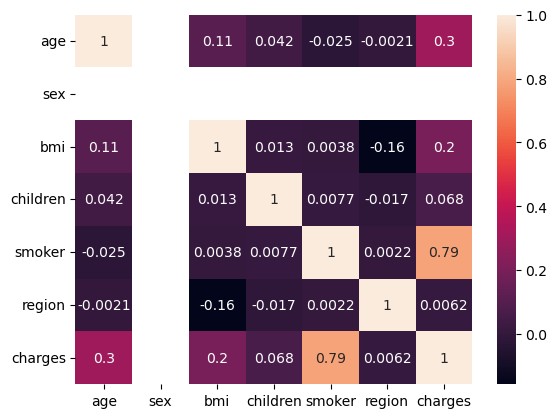

In [19]:
sns.heatmap(data.corr(),annot=True)

In [21]:
x = data[['age', 'bmi', 'smoker']]
y = data['charges']

In [22]:
print('Training Size = ',0.80*1338)

Training Size =  1070.4


In [23]:
x_train = x[:1071]
x_test = x[1071:]

y_train = y[:1071]
y_test = y[1071:]

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
y_predicted = model.predict(x_test)

In [27]:
mean_squared_error(y_test,y_predicted)

37473868.74426436

In [28]:
r2_score(y_test,y_predicted)


0.7532812226189822

In [29]:
age = 31
bmi = 45
smoker = 0 # yes
model.predict([[age,bmi,smoker]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10849.36572767])

In [30]:
pd.DataFrame({'Test_data_actual':y_test,'Test_data_predicted':y_predicted,
             'difference':abs(y_test-y_predicted)}).head()

,Test_data_actual,Test_data_predicted,difference
1071,13974.45555,14818.547963,844.092413
1072,1909.52745,3767.490376,1857.962926
1073,12096.65120,11630.394056,466.257144
1074,13204.28565,9774.521742,3429.763908
1075,4562.84210,6104.736588,1541.894488
